## Ejercicios de pair programming 20 enero: Normalización

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro
import researchpy as rp
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [4]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [5]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
11,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0
12,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0
14,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0
15,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0
16,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

### Normalización de la variable respuesta

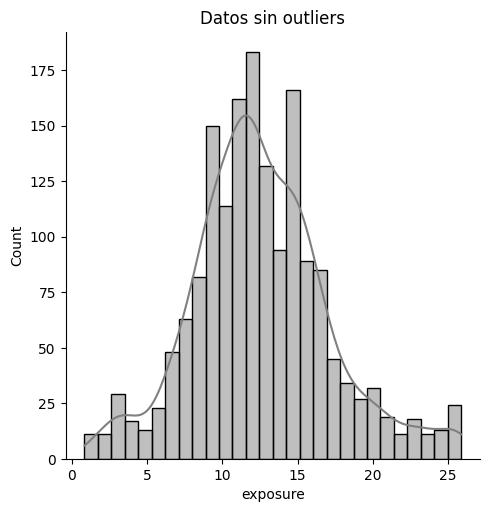

In [7]:
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

A la vista de la gráfica hemos pensado que el método de raiz cuadrada podría servir para normalizar la variable respuesta.

In [9]:
df_limpio['exposure_RAIZ'] = df_limpio['exposure'].apply(lambda x: math.sqrt(x))

In [10]:
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_RAIZ
11,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0,4.822862
12,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0,4.547527
14,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,4.295346
15,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0,4.300000
16,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0,4.711688


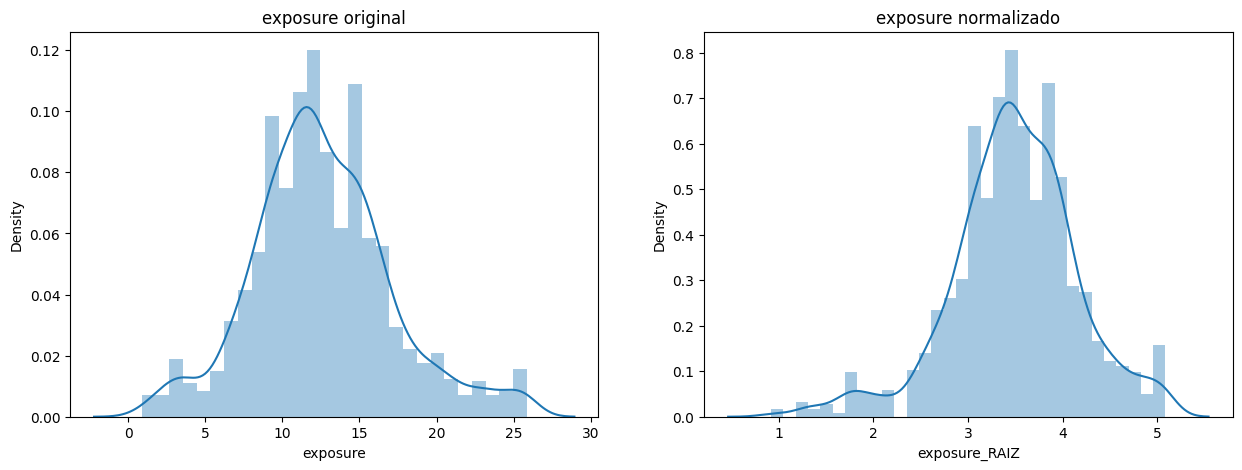

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0])
sns.distplot(df_limpio["exposure_RAIZ"], ax = axes[1]);

In [18]:
stats.shapiro(df_limpio['exposure_RAIZ'])

ShapiroResult(statistic=0.9764954447746277, pvalue=4.16191465048193e-16)

El método de raiz cuadrada no ha normalizado nuestra variable respuesta. Vamos probar BoxCox.

In [19]:
df_limpio['exposure_BOX'], lambda_ajustada = stats.boxcox(df_limpio['exposure'])

In [20]:
lambda_ajustada

0.7744084569993969

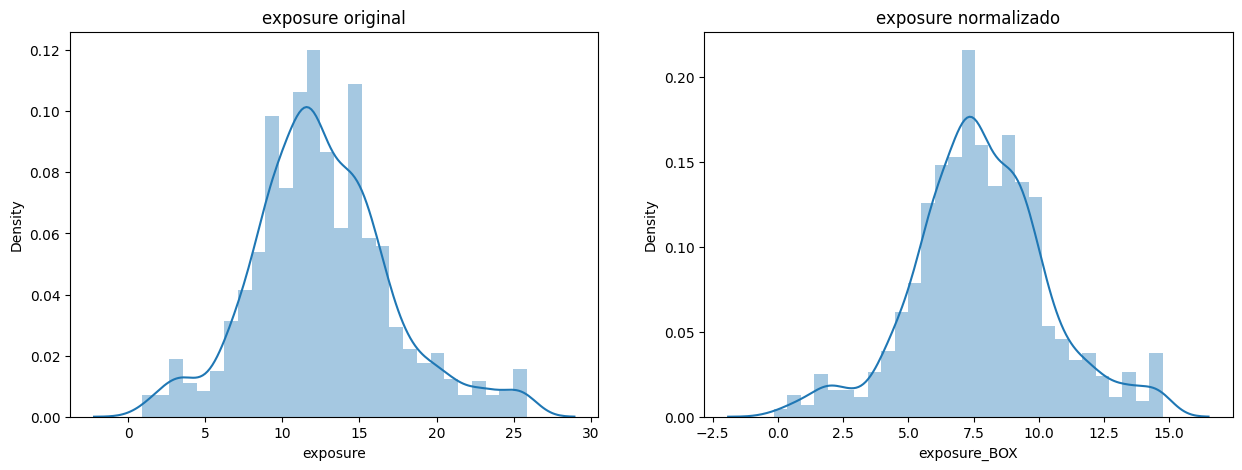

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0])
sns.distplot(df_limpio["exposure_BOX"], ax = axes[1]);

In [22]:
stats.shapiro(df_limpio['exposure_BOX'])

ShapiroResult(statistic=0.9866289496421814, pvalue=1.761829744595378e-11)

In [24]:
numericas = df_limpio.select_dtypes(include = np.number)

minmax = MinMaxScaler()
minmax.fit(df_limpio[['exposure']])

X_normalizadas = minmax.transform(df_limpio[["exposure"]])
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["exposure_Sklearn"])

df_limpio["exposure_Sklearn"] = numericas_minmax

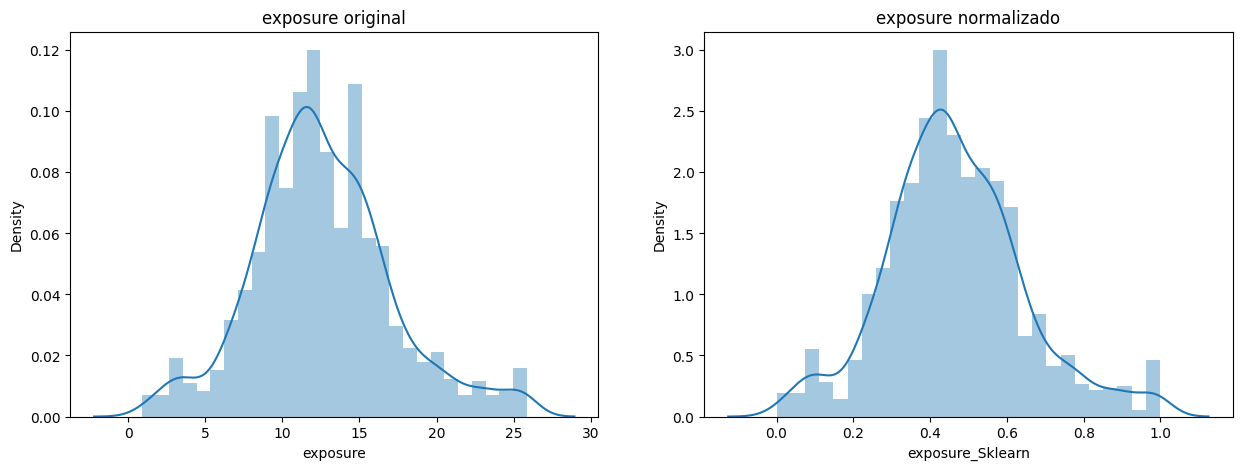

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(df_limpio['exposure'] ,ax = axes[0])
sns.distplot(df_limpio["exposure_Sklearn"], ax = axes[1]);

In [27]:
stats.shapiro(df_limpio['exposure_Sklearn'])

ShapiroResult(statistic=nan, pvalue=1.0)

Hemos conseguido normalizar nuestra variable respuesta con Sklearn.

In [29]:
df_limpio.drop(['exposure_RAIZ', 'exposure_BOX'], axis =1, inplace = True)

In [30]:
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
11,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0,0.713429
12,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0,0.784972
14,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,0.609113
15,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0,0.629097
16,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0,0.603517


### Outliers

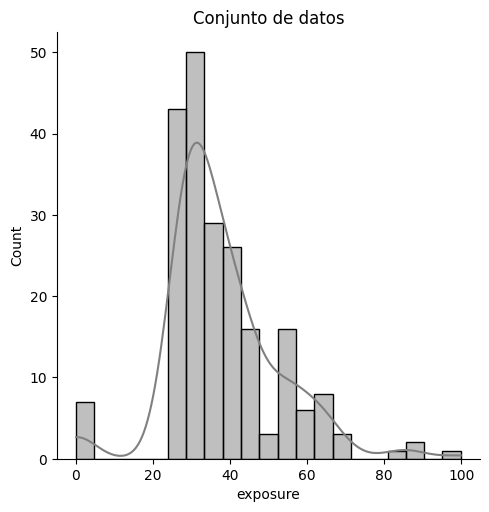

In [31]:
sns.displot(outliers["exposure"], kde = True, color = "grey")
plt.title('Outliers');

In [32]:
outliers['exposure_BOX'], lambda_ajustada = stats.boxcox(outliers['exposure'])

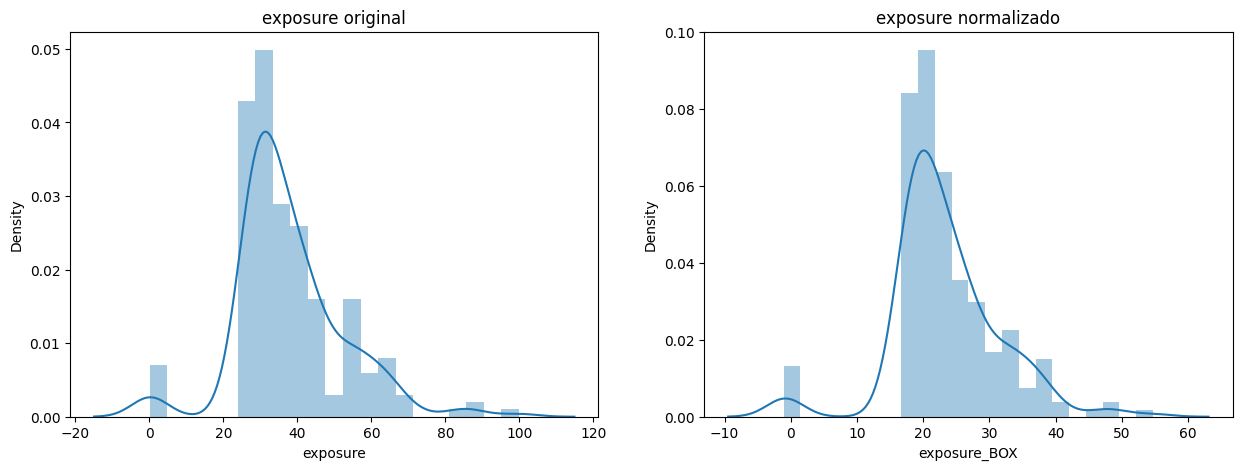

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(outliers['exposure'] ,ax = axes[0])
sns.distplot(outliers["exposure_BOX"], ax = axes[1]);

In [34]:
stats.shapiro(outliers['exposure_BOX'])

ShapiroResult(statistic=0.8956610560417175, pvalue=5.943401326646836e-11)

In [35]:
numericas = outliers.select_dtypes(include = np.number)

minmax = MinMaxScaler()
minmax.fit(outliers[['exposure']])

X_normalizadas = minmax.transform(outliers[["exposure"]])
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["exposure_Sklearn"])

outliers["exposure_Sklearn"] = numericas_minmax

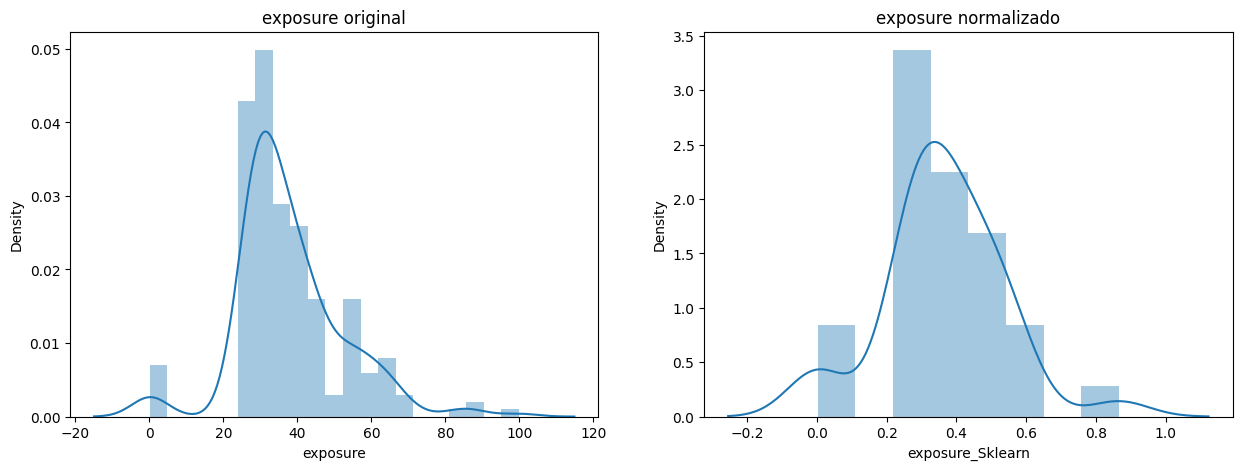

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('exposure original')
axes[1].set_title('exposure normalizado')

sns.distplot(outliers['exposure'] ,ax = axes[0])
sns.distplot(outliers["exposure_Sklearn"], ax = axes[1]);

In [37]:
stats.shapiro(outliers['exposure_Sklearn'])

ShapiroResult(statistic=nan, pvalue=1.0)

Para el df de outliers también hemos conseguido normalizar con sklearn

In [38]:
outliers.drop(['exposure_BOX'], axis =1, inplace = True)

In [39]:
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0,0.563758
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0,0.560853
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0,0.451167
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0,0.364119
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0,0.384353


In [40]:
#Guardamos los nuevos df con la columna nomalizada
df_limpio.to_csv('../datos/world_risk_index_sin_outliers_norm.csv')

In [41]:
outliers.to_csv('../datos/world_risk_index_outliers_norm.csv')